In [1]:
import pandas as pd
import numpy as np
import json
from pathlib import Path

import spacy
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


import scipy.stats as st
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt

from master_thesis.src import utils

pd.set_option('display.max_columns', 80) # make all columns visible
import xgboost

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ruecker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pickle
import shap

shap.initjs()

## BOW

In [3]:
# loading model with pickle
feature_type = "abs"
max_features = 1000 #500 # 200
modeltype = "ridge" #"xgboost" # "ridge"
publisher = "NOZ"

model_PATH = utils.OUTPUT / 'saved_models' / f'BOW_{modeltype}_{feature_type}_{str(max_features)}.pkl'

with open(model_PATH, 'rb') as p_in:
    model = pickle.load(p_in)
    

In [4]:
model

Ridge()

In [5]:
# loading features

print("loading features...", feature_type)
X_train = np.load(utils.OUTPUT / 'BOW_features' / f'{publisher}_X_train_{feature_type}_{str(max_features)}.npy')
X_dev = np.load(utils.OUTPUT / 'BOW_features' / f'{publisher}_X_dev_{feature_type}_{str(max_features)}.npy')
X_test = np.load(utils.OUTPUT / 'BOW_features' / f'{publisher}_X_test_{feature_type}_{str(max_features)}.npy')



loading features... abs


In [6]:
print(modeltype)

# ridge
if modeltype == "ridge":
    explainer = shap.LinearExplainer(model, X_train)
    shap_values = explainer.shap_values(X_dev)

# xgboost
if modeltype == "xgboost":
    #explainer = shap.Explainer(model, X_train)
    #shap_values = explainer(X_dev)
    explainer = shap.TreeExplainer(model, X_train) # mit oder ohne (, X_train) ??
    shap_values = explainer(X_dev) # explainer.shap_values(X_dev)

ridge


In [7]:
shap_values.shape

(3638, 1000)

In [8]:
# loading vectorizer and feature_names

with open(utils.OUTPUT / 'BOW_features' / f'{publisher}_vectorizer_{str(max_features)}.pkl', 'rb') as fp:
    vectorizer = pickle.load(fp)
    
feature_names = vectorizer.get_feature_names()
print(len(feature_names))

Trying to unpickle estimator CountVectorizer from version 0.22 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.


1000


In [9]:
vectorizer

CountVectorizer(max_features=1000, min_df=5, ngram_range=(1, 5),
                preprocessor=<master_thesis.src.utils.Preprocessor object at 0x7fa3987aa790>,
                stop_words=['', '', 'alle', 'alle', '', 'alle', '', '', '', '',
                            '', '', '', '', '', '', '', '', '', '', '', '', '',
                            '', 'sein', '', 'sein', '', '', '', ...])

In [10]:
feature_names[800]#[100:120] # find the name of a feature

'statt'

In [14]:
feature_names.index("statt") # search for a specific token

800

In [15]:
feature_names.index("foto") # search for a specific token

346

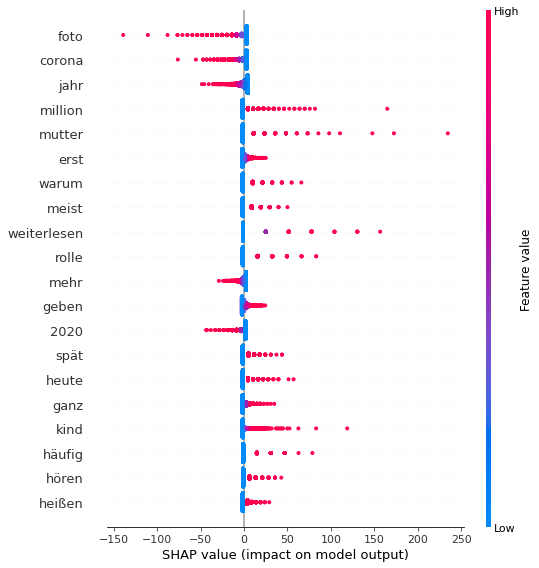

In [11]:
shap.summary_plot(shap_values, X_dev, feature_names = feature_names)

In [12]:
type(shap_values)

numpy.ndarray

In [16]:
shap_values[346] # "foto" (jedenfalls aktuell!)

array([-7.08380966e-02, -1.09979238e+00, -6.87491558e-01,  1.30094559e-02,
        6.61209533e-02, -1.95947028e-01, -1.84730221e-01,  1.19298708e-01,
       -7.49881551e-02,  2.09873318e-01,  8.48168010e-02,  1.22288031e-02,
        1.35151293e-01,  2.28310397e-01, -1.78789120e-01, -1.24224287e-02,
       -2.08380496e-01, -4.88620187e-02,  1.43725567e-01,  8.36791948e-01,
       -2.71739276e+00,  1.37081706e+00, -6.10365508e-02,  1.15921296e-01,
        4.25121192e-01,  3.70677128e-01, -2.12234412e-01, -8.71410911e-02,
       -2.56493213e-02,  9.44116167e-02, -1.31638218e+00,  1.94820363e-01,
       -4.81421602e-01,  3.04796435e-01, -1.44129421e-01, -2.24002633e-02,
       -2.20079124e-02, -4.62663897e-01, -4.00694146e-01, -1.13289241e-01,
       -2.69214369e+00, -3.05922462e-01, -1.46821502e-01,  2.66665690e-01,
       -2.22773840e-01, -9.20528823e-01,  4.28255926e-01, -3.23313808e-01,
       -2.32357815e-01,  2.88216621e-01,  2.65844622e-01,  9.44281581e-03,
        5.21457221e-02,  

In [18]:
shap.plots.bar(shap_values)#, feature_names = feature_names)

AssertionError: The shap_values paramemter must be a shap.Explanation object!

In [19]:
shap.plots.beeswarm(shap_values)#, feature_names = feature_names)

UnboundLocalError: local variable 'features' referenced before assignment

In [20]:
shap.plots.waterfall(shap_values[0])

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

In [21]:
shap.force_plot(explainer.expected_value[0], shap_values[0])

IndexError: invalid index to scalar variable.

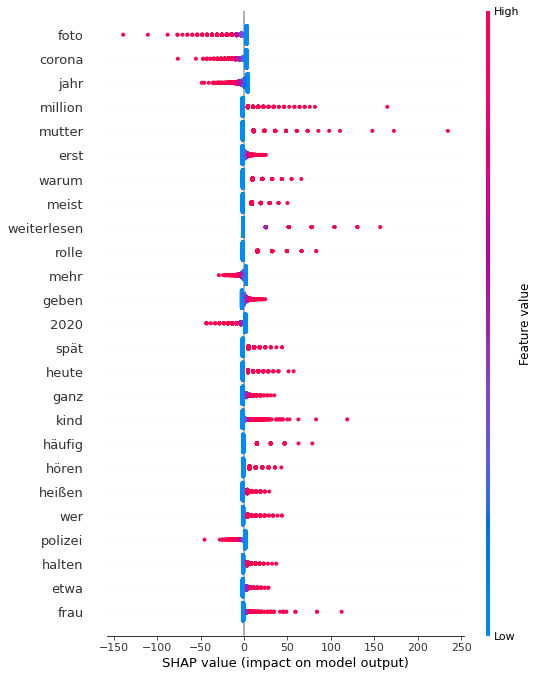

In [22]:
shap.summary_plot(shap_values, X_dev, feature_names=feature_names, max_display = 25)

In [23]:
xgboost.plot_importance(model, max_num_features = 12,
                       importance_type ="weight") # "weight" "gain" cover"

ValueError: tree must be Booster, XGBModel or dict instance

In [24]:
feature_names[657]

'osnabrück'

In [25]:
feature_names[608]

'mutter'

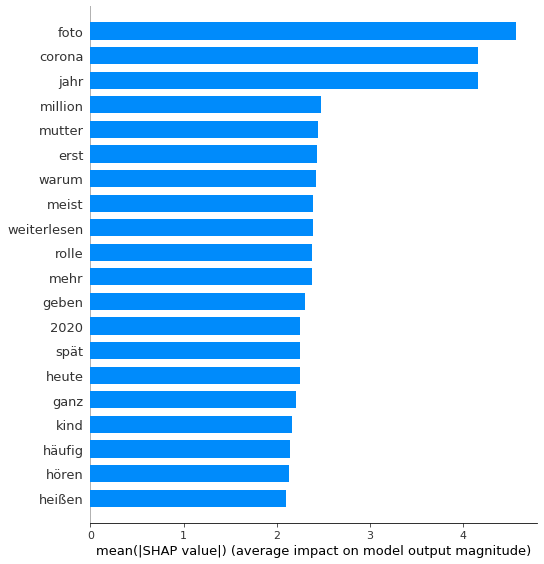

In [26]:
shap.summary_plot(shap_values, X_dev, plot_type="bar", feature_names=feature_names)

In [27]:
ind = 0
shap.force_plot(explainer.expected_value,
                shap_values[ind,:],
                X_dev[ind,:],
                feature_names=feature_names
               )

In [28]:
explainer.expected_value

185.80548506999776

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


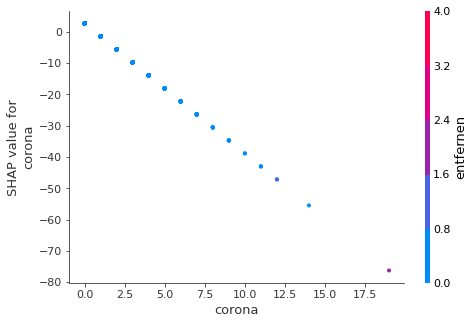

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


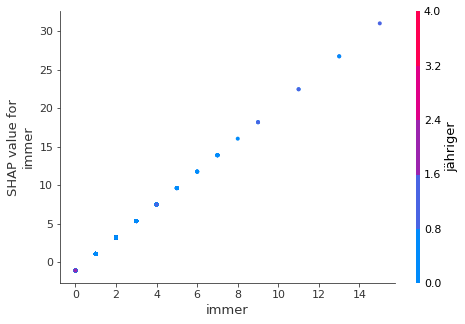

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


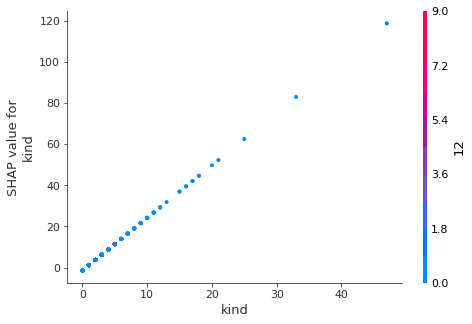

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


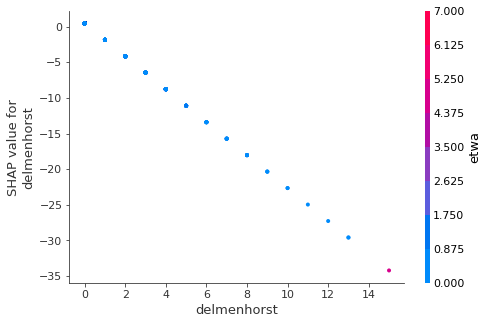

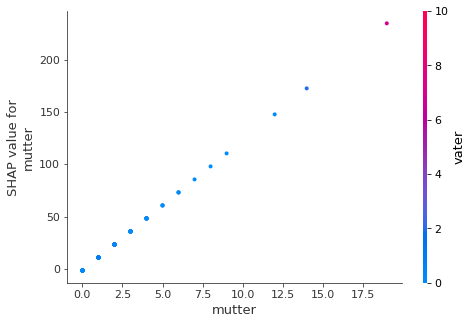

In [29]:
shap.dependence_plot("corona", shap_values, X_dev, feature_names=feature_names)
shap.dependence_plot("immer", shap_values, X_dev, feature_names=feature_names)
shap.dependence_plot("kind", shap_values, X_dev, feature_names=feature_names)
shap.dependence_plot("delmenhorst", shap_values, X_dev, feature_names=feature_names)
shap.dependence_plot("mutter", shap_values, X_dev, feature_names=feature_names)


# interessant: Corona wirkt sich *negativ* aus

In [203]:
def model_predict(data):
    if isinstance(data, list):        
        X = vectorizer.transform(data)
        X = X.toarray()
        outputs = model.predict(X)
    if isinstance(data, np.ndarray):
        outputs = model.predict(data)
    return np.array(outputs)

In [204]:
model_predict(["Das hier ist ein Artikel, der ist voll spannend. Geht um nen Unfall und einen Kindergarten und die neuste Mode."])

array([111.24805], dtype=float32)

In [205]:
PUBLISHER= "NOZ"
with open(utils.OUTPUT / "splits" / f"{PUBLISHER}_splits.json", "r") as f:
    splits = json.load(f)
    dev_IDs = splits["dev"]

In [206]:
NOZ = utils.get_publisher_df("NOZ")

Shape of df: (36383, 31)


In [207]:
NOZ_dev = NOZ.loc[dev_IDs]

In [208]:
NOZ_dev.head()

,pageviews,exits,entrances,bounces,timeOnPage,category,rubric,title,date,titel,prozentDpa,prozentVerlag,zeilen,pagePath,dpaGuid,article_text,titel_html,other_content,teaser,article_body,avgTimeOnPage,nr_tokens_text,avgTimeOnPagePerWordcount,avgTimeOnPage_percentile,pageviews_percentile,avgTimeOnPagePerWordcount_percentile,language,nr_tokens_text_punct,nr_tokens_text_BERT,publisher,nr_tokens_publisher
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NOZ_2093706,448,187,86,20,54204.0,lokales,melle,das-gruene-gewerbegebiet-in-melle-ist-nicht-gr...,NaN,"Initiative ""Grün statt Grau"" übt Kritik: Das g...",NaN,NaN,NaN,NaN,NaN,"Initiative ""Grün statt Grau"" übt Kritik: Das g...","Initiative ""Grün statt Grau"" übt Kritik: Das g...",no,"Melle. Nachhaltig, ökologisch, zukunftsfähig: ...","""Der erste Entwurf des Bebauungsplanes ist ein...",207.678161,705,0.294579,72.050268,53.606490,27.254341,de,785,987,NOZ,705
NOZ_1990893,189,116,107,25,11896.0,NaN,www.noz.de,staatssekretaer-sieht-delmenhorster-krankenhau...,NaN,Heiger Scholz zu Besuch im JHD: Staatssekretär...,NaN,NaN,NaN,NaN,NaN,Heiger Scholz zu Besuch im JHD: Staatssekretär...,Heiger Scholz zu Besuch im JHD: Staatssekretär...,no,Delmenhorst. Staatssekretär Heiger Scholz aus ...,"Er hat nicht lang nachdenken müssen, als die F...",162.958904,576,0.282915,46.143532,22.539996,24.593219,de,645,806,NOZ,576
NOZ_2053403,421,294,257,75,25541.0,lokales,soegel,so-feiern-katholiken-in-boerger-und-surwold-zu...,NaN,Pfarreiengemeinschaft gibt sich neue Regeln: S...,NaN,NaN,NaN,NaN,NaN,Pfarreiengemeinschaft gibt sich neue Regeln: S...,Pfarreiengemeinschaft gibt sich neue Regeln: S...,no,Börger. Mit Beschränkungen bei den Wochenend-G...,„Wir haben uns die Entscheidungen und Maßnahme...,201.110236,457,0.440066,69.039178,51.721434,56.835742,de,516,705,NOZ,457
NOZ_2093781,261,127,89,36,13485.0,deutschland-und-welt,vermischtes,drei-monate-altes-baby-stirbt-in-japan-durch-v...,NaN,Erneuter Fall in Tokio: Drei Monate altes Baby...,NaN,NaN,NaN,NaN,NaN,Erneuter Fall in Tokio: Drei Monate altes Baby...,Erneuter Fall in Tokio: Drei Monate altes Baby...,no,Tokio. Wenige Wochen nach einem schweren Fall ...,In der japanischen Hauptstadt Tokio hat eine 3...,100.634328,261,0.385572,11.410326,34.637760,47.295700,de,292,330,NOZ,261
NOZ_2133782,1121,929,896,742,25763.0,deutschland-und-welt,nordrhein-westfalen,radfahrer-sticht-frau-in-luebbecke-von-hinten-...,NaN,Leichte Schnittverletzung: Radfahrer sticht Fr...,NaN,NaN,NaN,NaN,NaN,Leichte Schnittverletzung: Radfahrer sticht Fr...,Leichte Schnittverletzung: Radfahrer sticht Fr...,no,Lübbecke. Die Polizei ermittelt nach eigenen A...,Als die 25-jährige Lübbeckerin mit ihrem Fahrr...,134.182292,282,0.475824,27.767930,74.932961,62.103445,de,311,405,NOZ,282


In [209]:
dev_preds = model_predict(X_dev)

In [210]:
dev_preds = pd.DataFrame(dev_preds, index = NOZ_dev.index, columns = ["pred"])

In [211]:
dev_preds.head()

,pred
articleId,
NOZ_2093706,202.836761
NOZ_1990893,183.030060
NOZ_2053403,167.942581
NOZ_2093781,195.478363
NOZ_2133782,152.662170


In [212]:
# append text (just for inspecting)
for id_nr, ID in enumerate(dev_preds.index):
    dev_preds.loc[ID, "true"] = NOZ.loc[ID, "avgTimeOnPage"]
    dev_preds.loc[ID, "article_text"] = NOZ.loc[ID, "article_text"]
    dev_preds.loc[ID, "nr"] = int(id_nr)
    dev_preds.loc[ID, "textlength"] = NOZ.loc[ID, "nr_tokens_text_BERT"]

In [213]:
dev_preds.head()

,pred,true,article_text,nr,textlength
articleId,,,,,
NOZ_2093706,202.836761,207.678161,"Initiative ""Grün statt Grau"" übt Kritik: Das g...",0.0,987.0
NOZ_1990893,183.030060,162.958904,Heiger Scholz zu Besuch im JHD: Staatssekretär...,1.0,806.0
NOZ_2053403,167.942581,201.110236,Pfarreiengemeinschaft gibt sich neue Regeln: S...,2.0,705.0
NOZ_2093781,195.478363,100.634328,Erneuter Fall in Tokio: Drei Monate altes Baby...,3.0,330.0
NOZ_2133782,152.662170,134.182292,Leichte Schnittverletzung: Radfahrer sticht Fr...,4.0,405.0


In [35]:
def scatter(true, pred):
    print(len(true), true[:5])
    print(len(pred), pred[:5])
    plt.scatter(true, pred, alpha = 0.1)
    plt.xlabel('True')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(0,1000)
    plt.ylim(0,1000)
    plt.show()
    
    print("Pearson:", st.pearsonr(true, pred))
    print("Spearman:", st.spearmanr(true, pred)[0])

    print("MAE:", mean_absolute_error(true, pred))
    print("MSE:", mean_squared_error(true, pred))
    print("RAE:", utils.relative_absolute_error(pred, true))

3638 articleId
NOZ_2093706    207.678161
NOZ_1990893    162.958904
NOZ_2053403    201.110236
NOZ_2093781    100.634328
NOZ_2133782    134.182292
Name: true, dtype: float64
3638 articleId
NOZ_2093706    184.310217
NOZ_1990893    150.614412
NOZ_2053403    175.260623
NOZ_2093781    252.831938
NOZ_2133782    154.531291
Name: pred, dtype: float64


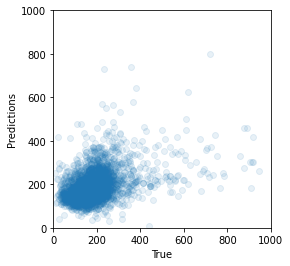

Pearson: (0.4759702004888049, 4.129035685511239e-205)
Spearman: 0.4315046752282406
MAE: 66.56186671357133
MSE: 15163.246959714665
RAE: 93.39221169017073


In [36]:
scatter(true = dev_preds.true, pred = dev_preds.pred)

In [31]:
identifier = f'BOW_{modeltype}_{feature_type}_{str(max_features)}'
print(identifier)

BOW_ridge_abs_1000


In [216]:
dev_preds.to_csv(utils.OUTPUT / "predictions_dev" / f'{identifier}.tsv', sep ="\t", 
                 index=True,
                 index_label="articleId")

BOW_xgboost_abs_1000


In [32]:
dev_preds = pd.read_csv(utils.OUTPUT / "predictions_dev" / f'{identifier}.tsv', sep ="\t", 
                       index_col = "articleId")

In [33]:
dev_preds.sort_values("pred", ascending = False).head(20) # höchste Predictions
#dev_preds.sort_values("pred", ascending = True).head(20) # niedrigste Predictions

,pred,true,article_text,nr,textlength
articleId,,,,,
NOZ_2063514,1238.865752,540.107961,Alicia Kozakiewicz im Interview: Kinderpornogr...,1726.0,4459.0
NOZ_559307,1070.186175,454.701299,„Palmarum Qualmarum“ 1945: Historischer Ticker...,2255.0,3441.0
NOZ_1376771,1037.806057,763.160305,Schauspieler und vierfacher Vater: Wolfram Koc...,2914.0,3400.0
NOZ_570900,801.257985,721.244961,Was kommt nach „Avengers: Endgame“?: Phase 4: ...,22.0,2223.0
NOZ_515048,799.242910,2396.707547,Gitarrist und Sänger im Interview: Farin Urlau...,302.0,2916.0
NOZ_712712,752.157471,1383.452214,Mao Tsetung: „Ich habe meine Mutter getötet“ –...,2820.0,1396.0
NOZ_1997330,740.246026,356.842857,Interview zu Thüringen und AfD: Politikwissens...,3063.0,3260.0
NOZ_2046882,731.314606,231.781250,Schauspieler im Interview: Axel Milberg: Tator...,832.0,3816.0
NOZ_407676,649.770588,1198.602410,„Vaters Traum verwirklicht“ Mit dem Ende der F...,1370.0,3052.0


In [219]:
ind = 2914 #1726 # 3547
shap.force_plot(explainer.expected_value,
                shap_values[ind,:],
                X_dev[ind,:],
                feature_names=feature_names
               )

AssertionError: visualize() can only display Explanation objects (or arrays of them)!